In [13]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [14]:
file = "output_data/Final_api_movie_2019.csv"
read_file = pd.read_csv(file)

df_file = pd.DataFrame(read_file)
df_file.head(3)


,ID,Title,Adult,Budget,Genres,Language,Production Company,Popularity,Revenue,Production Country,...,omdb_released,omdb_runtime,omdb_director,omdb_actors,omdb_language,omdb_country,omdb_ratings,omdb_metascore,omdb_imdbRating,omdb_imdbVotes
0,475557,Joker,False,55000000,"['Crime', 'Thriller', 'Drama']",en,"['DC Entertainment', 'Warner Bros. Pictures', ...",462.910,568509478,['United States of America'],...,04 Oct 2019,122 min,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",English,"USA, Canada","[{'Source': 'Internet Movie Database', 'Value'...",59.0,8.9,"360,218"
1,420809,Maleficent: Mistress of Evil,False,0,"['Fantasy', 'Adventure', 'Family']",en,['Walt Disney Pictures'],287.919,0,['United States of America'],...,18 Oct 2019,118 min,Joachim Rønning,"Angelina Jolie, Elle Fanning, Imelda Staunton,...",English,USA,"[{'Source': 'Rotten Tomatoes', 'Value': '51%'}]",NaN,NaN,NaN
2,420818,The Lion King,False,260000000,"['Adventure', 'Animation', 'Drama']",en,"['Walt Disney Pictures', 'Fairview Entertainme...",183.255,1649676757,['United States of America'],...,19 Jul 2019,118 min,Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",55.0,7.1,"102,621"


In [15]:
# dropping the rows that have no value for Omdb-Rated and Revenue
df_1 = df_file.dropna(subset = ["omdb_rated","Revenue"])
df_1.head()

,ID,Title,Adult,Budget,Genres,Language,Production Company,Popularity,Revenue,Production Country,...,omdb_released,omdb_runtime,omdb_director,omdb_actors,omdb_language,omdb_country,omdb_ratings,omdb_metascore,omdb_imdbRating,omdb_imdbVotes
0,475557,Joker,False,55000000,"['Crime', 'Thriller', 'Drama']",en,"['DC Entertainment', 'Warner Bros. Pictures', ...",462.910,568509478,['United States of America'],...,04 Oct 2019,122 min,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",English,"USA, Canada","[{'Source': 'Internet Movie Database', 'Value'...",59.0,8.9,"360,218"
1,420809,Maleficent: Mistress of Evil,False,0,"['Fantasy', 'Adventure', 'Family']",en,['Walt Disney Pictures'],287.919,0,['United States of America'],...,18 Oct 2019,118 min,Joachim Rønning,"Angelina Jolie, Elle Fanning, Imelda Staunton,...",English,USA,"[{'Source': 'Rotten Tomatoes', 'Value': '51%'}]",NaN,NaN,NaN
2,420818,The Lion King,False,260000000,"['Adventure', 'Animation', 'Drama']",en,"['Walt Disney Pictures', 'Fairview Entertainme...",183.255,1649676757,['United States of America'],...,19 Jul 2019,118 min,Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",55.0,7.1,"102,621"
4,429617,Spider-Man: Far from Home,False,160000000,"['Action', 'Adventure', 'Science Fiction']",en,"['Marvel Studios', 'Sony Pictures', 'Columbia ...",123.576,1131450163,['United States of America'],...,02 Jul 2019,129 min,Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...","Italian, Czech, English",USA,"[{'Source': 'Internet Movie Database', 'Value'...",69.0,7.7,"187,214"
5,559969,El Camino: A Breaking Bad Movie,False,6000000,"['Crime', 'Drama', 'Thriller']",en,"['Sony Pictures Television', 'High Bridge Prod...",109.708,0,['United States of America'],...,11 Oct 2019,122 min,Vince Gilligan,"Aaron Paul, Jonathan Banks, Matt Jones, Charle...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",72.0,7.7,"81,896"


In [16]:
### MPAA rating (Omdb_rating) Vs. Revenue

In [63]:
# dropping the rows with 0 Revenue
index_1 = df_1[df_1['Revenue']==0].index
df_1.drop(index0, inplace = True)
df_1[['omdb_rated','Revenue']].head()

,omdb_rated,Revenue
0,R,568509478
2,PG,1649676757
4,PG-13,1131450163
6,G,519802847
7,R,32000000


In [18]:
#Outlier for the revenue
df_1['Revenue'].max()

2797800564

In [19]:
df_1['omdb_rated'].value_counts()

R            1224
PG-13         837
PG            310
Not Rated     304
G              30
Unrated        27
TV-MA          22
TV-14          20
TV-PG           5
TV-Y7           3
TV-Y            2
NC-17           2
Name: omdb_rated, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

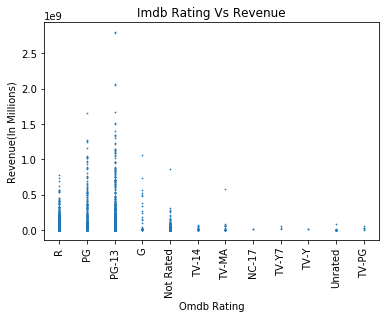

In [70]:
# MPAA rating (Omdb_Rating) Vs Revenue
plt.scatter(df_1["omdb_rated"],df_1["Revenue"], s= 0.5)
plt.title("Imdb Rating Vs Revenue")
plt.xlabel("Omdb Rating")
plt.ylabel("Revenue(In Millions)")
plt.xticks(rotation=90)

In [ ]:
### MPAA rating(Omdb-Rating) vs Vote Average

In [27]:
# dropping the rows that have no value for Omdb-Rated and Revenue
df_2 = df_file.dropna(subset = ["omdb_rated","Vote Average"])
df_2.head()

,ID,Title,Adult,Budget,Genres,Language,Production Company,Popularity,Revenue,Production Country,...,omdb_released,omdb_runtime,omdb_director,omdb_actors,omdb_language,omdb_country,omdb_ratings,omdb_metascore,omdb_imdbRating,omdb_imdbVotes
0,475557,Joker,False,55000000,"['Crime', 'Thriller', 'Drama']",en,"['DC Entertainment', 'Warner Bros. Pictures', ...",462.910,568509478,['United States of America'],...,04 Oct 2019,122 min,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",English,"USA, Canada","[{'Source': 'Internet Movie Database', 'Value'...",59.0,8.9,"360,218"
1,420809,Maleficent: Mistress of Evil,False,0,"['Fantasy', 'Adventure', 'Family']",en,['Walt Disney Pictures'],287.919,0,['United States of America'],...,18 Oct 2019,118 min,Joachim Rønning,"Angelina Jolie, Elle Fanning, Imelda Staunton,...",English,USA,"[{'Source': 'Rotten Tomatoes', 'Value': '51%'}]",NaN,NaN,NaN
2,420818,The Lion King,False,260000000,"['Adventure', 'Animation', 'Drama']",en,"['Walt Disney Pictures', 'Fairview Entertainme...",183.255,1649676757,['United States of America'],...,19 Jul 2019,118 min,Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",55.0,7.1,"102,621"
4,429617,Spider-Man: Far from Home,False,160000000,"['Action', 'Adventure', 'Science Fiction']",en,"['Marvel Studios', 'Sony Pictures', 'Columbia ...",123.576,1131450163,['United States of America'],...,02 Jul 2019,129 min,Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...","Italian, Czech, English",USA,"[{'Source': 'Internet Movie Database', 'Value'...",69.0,7.7,"187,214"
5,559969,El Camino: A Breaking Bad Movie,False,6000000,"['Crime', 'Drama', 'Thriller']",en,"['Sony Pictures Television', 'High Bridge Prod...",109.708,0,['United States of America'],...,11 Oct 2019,122 min,Vince Gilligan,"Aaron Paul, Jonathan Banks, Matt Jones, Charle...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",72.0,7.7,"81,896"


In [61]:
df_2[["omdb_rated","Vote Average"]].head()

,omdb_rated,Vote Average
0,R,8.6
1,PG,7.1
2,PG,7.1
4,PG-13,7.6
5,TV-MA,7.2


In [66]:
df_1['Vote Average'].value_counts()

5.9    136
6.2    136
6.0    134
6.6    130
6.1    128
6.5    127
6.3    125
6.8    122
5.8    118
6.4    118
6.7    111
6.9    109
7.1    103
7.4     96
7.2     94
7.3     92
7.0     88
5.7     82
5.5     81
5.6     77
7.5     57
5.4     57
7.6     53
5.3     52
5.1     43
7.8     36
7.7     34
5.2     33
7.9     27
5.0     26
8.1     19
8.0     18
4.9     16
4.8     16
4.5     11
8.3     11
8.2     10
4.6     10
4.7      9
4.1      7
4.4      7
4.0      5
4.3      5
4.2      4
8.5      2
8.4      2
1.9      1
3.9      1
3.2      1
3.0      1
2.5      1
8.6      1
2.1      1
3.3      1
9.4      1
Name: Vote Average, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

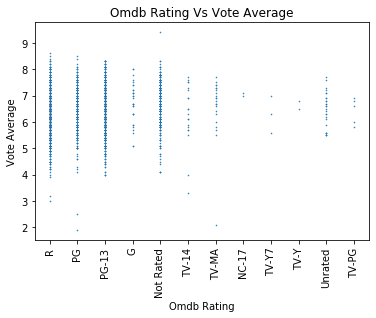

In [60]:
plt.scatter(df_1["omdb_rated"],df_1["Vote Average"],s = 0.3)
plt.title("Omdb Rating Vs Vote Average")
plt.xlabel("Omdb Rating")
# plt.ylabel("Revenue(In Millions)")
plt.xticks(rotation=90)